

# Sentimen Aplikasi RuangGuru

In [1]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
df_review = pd.read_csv("/content/scrapped_data.csv")
df_test = df_review
df_review.head(5)

,userName,score,at,content
0,Paula Manaruri,5,2024-03-21 13:19:15,Oke🥰🥰
1,Yustinus Alexsander,5,2024-03-21 11:57:55,Aplikasi ini sangat bagus kalau penjelsanya le...
2,ax el,5,2024-03-21 11:25:29,Gara Gara ini IQ KU NAIK😁👍
3,Adry Daea,5,2024-03-21 08:11:57,Sangat membantu
4,Olinda Fitri,1,2024-03-21 07:55:07,Halo perkenalkan nama ku olinda awalnya aku ki...


In [3]:
df_as = pd.read_csv("/content/scrapped_data.csv")

## Menampilkan Grafik Frekuensi Rating

In [4]:
df_as['score'].value_counts()

5    648
1    126
4     62
3     46
2     30
Name: score, dtype: int64

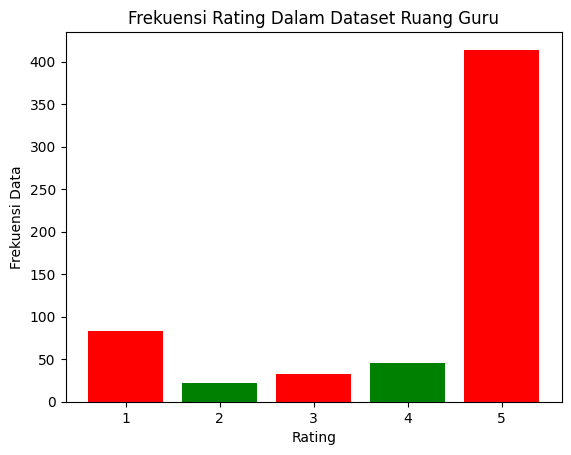

In [5]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [83, 22, 33, 45, 414]

# labels for bars
tick_label = [1, 2, 3, 4, 5]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Rating')
# naming the y-axis
plt.ylabel('Frekuensi Data')
# plot title
plt.title('Frekuensi Rating Dalam Dataset Ruang Guru')

# function to show the plot
plt.show()

## Pelabelan Berdasarkan Rating

In [6]:
sentimen = []
for index, row in df_review.iterrows():
     if row['score']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_review['sentimen'] = sentimen
df_review = df_review.drop(columns=['score'])
df_review.head()

,userName,at,content,sentimen
0,Paula Manaruri,2024-03-21 13:19:15,Oke🥰🥰,positif
1,Yustinus Alexsander,2024-03-21 11:57:55,Aplikasi ini sangat bagus kalau penjelsanya le...,positif
2,ax el,2024-03-21 11:25:29,Gara Gara ini IQ KU NAIK😁👍,positif
3,Adry Daea,2024-03-21 08:11:57,Sangat membantu,positif
4,Olinda Fitri,2024-03-21 07:55:07,Halo perkenalkan nama ku olinda awalnya aku ki...,negatif


In [7]:
df_review['sentimen'].value_counts()

positif    756
negatif    156
Name: sentimen, dtype: int64

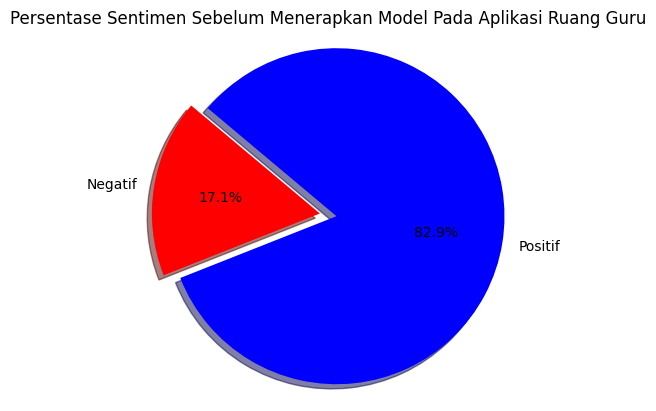

Negatif = 156
Positif = 756
Jumlah Keseluruhan Data = 912


In [56]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [156, 756]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Sebelum Menerapkan Model Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

### Menghilangkan Kolom yang Tidak Digunakan

In [9]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop (columns=['userName', 'at'])
df_preprocessed.head()

,content,sentimen
0,Oke🥰🥰,positif
1,Aplikasi ini sangat bagus kalau penjelsanya le...,positif
2,Gara Gara ini IQ KU NAIK😁👍,positif
3,Sangat membantu,positif
4,Halo perkenalkan nama ku olinda awalnya aku ki...,negatif


## Cleansing

In [10]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [11]:
#jalankan cleansing data
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()


,content,sentimen
0,oke,positif
1,aplikasi ini sangat bagus kalau penjelsanya le...,positif
2,gara gara ini iq ku naik,positif
3,sangat membantu,positif
4,halo perkenalkan nama ku olinda awalnya aku ki...,negatif


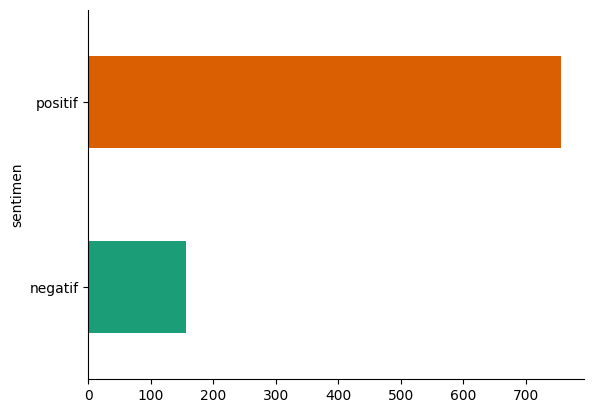

In [12]:
# @title Menampilkan Sentimen

from matplotlib import pyplot as plt
import seaborn as sns
df_preprocessed.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df_as['content'].iloc[5]

'Menurut saya dulunya ini aplikasi yang bagus, sekarang saya menyesal karena perpanjang paket dan semenjak itu juga ruang guru saya ngebug trs latihaj soal soal nya kalau gak ilang salah satu atau 2 opsi jawaban hilang di update bukanya makin bagus malah makin jelek'

In [14]:
df_as['content'].iloc[110]

'Banyak bug dikarenakan sistem katanya soalnya pakai wifi yg 100 Mbps masih bermasalah video nya gak bisa ditonton dan biasa nya tiba tiba video nya seperti belum langganan cuman bisa 1 bab mohon cepat di benarkan'

In [15]:
text = df_as['content'].iloc[110]
print(cleansing(text))

banyak bug dikarenakan sistem katanya soalnya pakai wifi yg 100 mbps masih bermasalah video nya gak bisa ditonton dan biasa nya tiba tiba video nya seperti belum langganan cuman bisa 1 bab mohon cepat di benarkan


## Remove Stopword

In [16]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [17]:
# import libary
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#contoh
kalimat ='Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
stop = stopword.remove(kalimat)
print(stop)


Aplikasi yg keren nih, khususnya fitur terbaru ZenCore.. Kita melatih kemampuan belajar CorePractice berkali-kali.. Belajar jadi lebih asik nyaman.. Semoga kedepannya muncul fitur" keren ya


In [18]:
text = df_as['content'].iloc[30]
txt = cleansing(text)
text2 = stopword.remove(txt)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)

Awal :  Gabisa download di pc, payah bgt 👎🏻👎🏻
Cleansing :  gabisa download di pc  payah bgt 
Stopword :  gabisa download pc  payah bgt 


In [19]:
review = []
for index, row in df_preprocessed.iterrows():
     review.append(stopword.remove(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()

,content,sentimen
0,oke,positif
1,aplikasi sangat bagus kalau penjelsanya lengka...,positif
2,gara gara iq ku naik,positif
3,sangat membantu,positif
4,halo perkenalkan nama ku olinda awalnya aku ki...,negatif


## Stemming

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()
#contoh
kalimat = 'Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
katadasar = Stemmer.stem(kalimat)
print(katadasar)

aplikasi yg keren nih khusus untuk fitur baru zencore kita bisa latih mampu ajar di corepractice kali ajar jadi lebih asik dan nyaman moga depan muncul fitur keren lagi ya


In [21]:
text = df_as['content'].iloc[204]
txt = cleansing(text)
text2 = stopword.remove(txt)
text3 = Stemmer.stem(text2)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)
print("Stemming : ", text3)

Awal :  Kenapa saat ini banyak bug di appnya,kadang video tidak bisa dibuka padahal signal aman² aja, pemberitahuannya hanya sistem sedang error,padahal pembelajarannya sangat membantu
Cleansing :  kenapa saat ini banyak bug di appnya kadang video tidak bisa dibuka padahal signal aman aja  pemberitahuannya hanya sistem sedang error padahal pembelajarannya sangat membantu
Stopword :  saat banyak bug appnya kadang video bisa dibuka padahal signal aman aja  pemberitahuannya sistem sedang error padahal pembelajarannya sangat membantu
Stemming :  saat banyak bug appnya kadang video bisa buka padahal signal aman aja pemberitahuannya sistem sedang error padahal ajar sangat bantu


In [22]:
#implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
     review.append(Stemmer.stem(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()

,content,sentimen
0,oke,positif
1,aplikasi sangat bagus kalau penjelsanya lengka...,positif
2,gara gara iq ku naik,positif
3,sangat bantu,positif
4,halo kenal nama ku olinda awal aku kira bagus ...,negatif


In [23]:
df_preprocessed.to_excel("ruangGuru.xlsx", index = False)

In [24]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

In [25]:
text = df_as['content'].iloc[234]
print("text asli : ",text)
print("text prepocess : ",preprocess_data(text))

text asli :  Membantu saya belajar
text prepocess :  bantu ajar


## Split Dataset into Train and Test

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed['content'],df_preprocessed['sentimen'],
                                                   test_size=0.2, stratify=df_preprocessed['sentimen'], random_state=0)

## Pembobotan TF-ID

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [28]:
kamus = vectorizer.vocabulary_
kamus["aku"]

72

In [29]:
def preprocess_data2(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  vector = []
  kalimat = data.split()
  for i in kalimat:
    vec = kamus.get(i)
    vector.append(vec)
  return vector

In [30]:
def preprocess_data3(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  data = vectorizer.transform([data])
  return data

In [31]:
data = "suka ruang guru"
print(preprocess_data3(data))

  (0, 1356)	0.7070601496768674
  (0, 1206)	0.5015081411085476
  (0, 513)	0.4985534365950908


In [32]:
data = "suka ruang guru"
print(preprocess_data2(data))

[1356, 1206, 513]


In [33]:
df_as = df_as.astype({"content":str})

In [34]:
df_as.dtypes

userName    object
score        int64
at          object
content     object
dtype: object

In [35]:
df_as['content'][0]

'Oke🥰🥰'

In [36]:
df_as['pembobotan'] = ""
for j in range(0,len(df_as['content'])):
  df_as['pembobotan'][j] = preprocess_data2(df_as['content'][j])

<ipython-input-36-9a1ff4c01065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['pembobotan'][j] = preprocess_data2(df_as['content'][j])


In [37]:
df_as.head()

,userName,score,at,content,pembobotan
0,Paula Manaruri,5,2024-03-21 13:19:15,Oke🥰🥰,[1035]
1,Yustinus Alexsander,5,2024-03-21 11:57:55,Aplikasi ini sangat bagus kalau penjelsanya le...,"[114, 1234, 153, 653, 1092, 790, 172, 772, 983]"
2,ax el,5,2024-03-21 11:25:29,Gara Gara ini IQ KU NAIK😁👍,"[482, 482, 595, 748, 951]"
3,Adry Daea,5,2024-03-21 08:11:57,Sangat membantu,"[1234, 180]"
4,Olinda Fitri,1,2024-03-21 07:55:07,Halo perkenalkan nama ku olinda awalnya aku ki...,"[529, 695, 952, 748, 1039, 141, 72, 715, 153, ..."


### Memberikan Hasil Sentimen

In [38]:
sentimen = []
for index, row in df_as.iterrows():
     if row['score']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_as['sentimen'] = sentimen
df_as.head()

,userName,score,at,content,pembobotan,sentimen
0,Paula Manaruri,5,2024-03-21 13:19:15,Oke🥰🥰,[1035],positif
1,Yustinus Alexsander,5,2024-03-21 11:57:55,Aplikasi ini sangat bagus kalau penjelsanya le...,"[114, 1234, 153, 653, 1092, 790, 172, 772, 983]",positif
2,ax el,5,2024-03-21 11:25:29,Gara Gara ini IQ KU NAIK😁👍,"[482, 482, 595, 748, 951]",positif
3,Adry Daea,5,2024-03-21 08:11:57,Sangat membantu,"[1234, 180]",positif
4,Olinda Fitri,1,2024-03-21 07:55:07,Halo perkenalkan nama ku olinda awalnya aku ki...,"[529, 695, 952, 748, 1039, 141, 72, 715, 153, ...",negatif


#### Menyimpan File Hasil Pembobotan TF-IDF

In [39]:
df_as.to_excel(r'/content/RuangGuruPembobotan.xlsx', index = False)

### Menampilkan Hasil Pembobotan TF-IDF

In [40]:
# import matplotlib.pyplot as plt

# # x-coordinates of left sides of bars
# left = [1, 2, 3, 4, 5,6,7,8]

# # heights of bars
# height = [316, 1348, 1931, 1093, 1357,167,185,344]

# # labels for bars
# tick_label = ["buka", "padahal", "tulis", "masuk", "paket","bagus","banget","cara"]

# # plotting a bar chart
# plt.bar(left, height, tick_label = tick_label,
#         width = 0.8, color = ['red', 'orange','blue'])

# # naming the x-axis
# plt.xlabel('Kata')
# # naming the y-axis
# plt.ylabel('Hasil Pembobotan')
# # plot title
# plt.title('Hasil Pembobotan TF-IDF')

# # function to show the plot
# plt.show()

### Memberubah Data Training dan Test ke Data Vektor Matriks Menggunakan  Pembobotan TF-IDF



In [41]:
#pada data kita
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test).todense()

print(x_test.shape)
print(x_test.shape)

(183, 1602)
(183, 1602)


In [42]:
count_array = x_train.toarray()
dfa = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())

In [43]:
print(x_train[0])

  (0, 19)	0.16680478818081923
  (0, 10)	0.16680478818081923
  (0, 369)	0.10574538252207831
  (0, 476)	0.13651928523893175
  (0, 1161)	0.1402458727776818
  (0, 1234)	0.0634165275232644
  (0, 779)	0.1446534903266621
  (0, 1309)	0.10054507210098801
  (0, 1016)	0.14643726595195028
  (0, 204)	0.1255925599612438
  (0, 539)	0.12789668037623542
  (0, 1065)	0.1570026827281085
  (0, 705)	0.1570026827281085
  (0, 1208)	0.08498726654689112
  (0, 1060)	0.11506876012098294
  (0, 1019)	0.1402458727776818
  (0, 466)	0.09626777813779101
  (0, 1198)	0.16680478818081923
  (0, 1046)	0.11809457492352471
  (0, 279)	0.08340145443265694
  (0, 654)	0.11809457492352471
  (0, 409)	0.1570026827281085
  (0, 785)	0.1952223548686959
  (0, 1456)	0.2804917455553636
  (0, 1417)	0.314005365456217
  (0, 1551)	0.1402458727776818
  (0, 318)	0.13329116827996587
  (0, 1343)	0.13651928523893175
  (0, 970)	0.1402458727776818
  (0, 1268)	0.12789668037623542
  (0, 1225)	0.30009595646078513
  (0, 1058)	0.0899754429264018
  (0, 93

## Preproses Data Dengan SVM

In [44]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC()

### Menampilkan Akurasi

In [45]:
y_test

13     positif
197    positif
687    positif
399    positif
789    positif
        ...   
255    positif
223    positif
367    positif
551    positif
886    positif
Name: sentimen, Length: 183, dtype: object

In [46]:
x_test

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(np.asarray(x_test))))

Accuracy score model final: 0.8688524590163934 


## Lakukan Prediksi Terhadap Seluruh Dataset Ruang Guru

In [61]:
dfRG = pd.read_excel("/content/ruangGuru.xlsx")
dfRG

,content,sentimen
0,oke,positif
1,aplikasi sangat bagus kalau penjelsanya lengka...,positif
2,gara gara iq ku naik,positif
3,sangat bantu,positif
4,halo kenal nama ku olinda awal aku kira bagus ...,negatif
...,...,...
907,baik lah,positif
908,sngat2 hebat aplikasi buat rakyat jadi pintar,positif
909,sangt mnyenang kn dn mmbuwt kit cpt memahaminx...,positif
910,keren banget,positif


In [63]:
dfRG['content'] = dfRG['content'].astype(str)

In [64]:
prediction = []
for i in range(0,len(dfRG['content'])):
  predict_transform = vectorizer.transform([dfRG['content'][i]])
  prediction.append(svm.predict(predict_transform))

In [65]:
dfRG['predict'] = prediction

In [66]:
dfRG['predict'].value_counts()

[positif]    778
[negatif]    134
Name: predict, dtype: int64

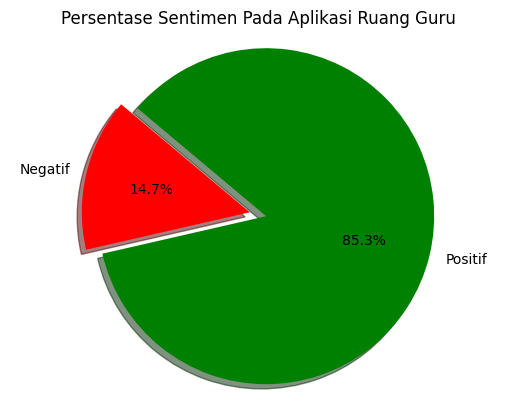

Negatif = 134
Positif = 778
Jumlah Keseluruhan Data = 912


In [67]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [134, 778]
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

In [68]:
dfRG.to_excel("ruangGuruPredict.xlsx", index = False)

## Evaluasi Model SVM

Evaluasi dan menampilkan confussion matrix untuk menghitung evaluasi

In [69]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = svm.predict(np.asarray(x_test))
print('Accuracy of SVM classifier on test set : {:.2f}'.format(svm.score(np.asarray(x_test), y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set : 0.87
[[ 12  19]
 [  5 147]]
              precision    recall  f1-score   support

     negatif       0.71      0.39      0.50        31
     positif       0.89      0.97      0.92       152

    accuracy                           0.87       183
   macro avg       0.80      0.68      0.71       183
weighted avg       0.86      0.87      0.85       183



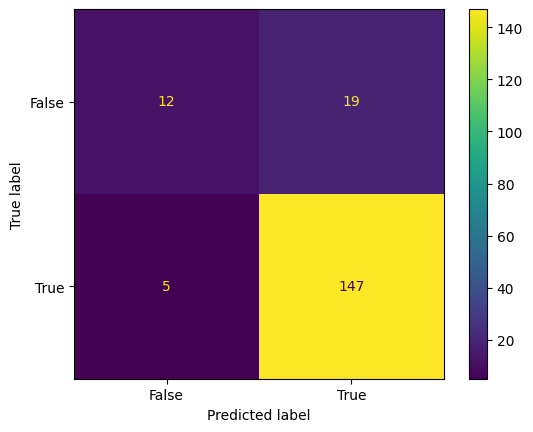

In [70]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()